# Homework 8
**Do Not turn in homework early. We will plan to submit your pull requests at the beginning of class Tuesday. Early submissions will be penalized.**

## Problem 1. 25 Points
Create a class called `Client`. When a client object is instantiated, it should set two data attributes: `username` and `password`. Give this class a unique representation which only shows the username, but obfuscates the password by changing the actual password to all X's that have the same length as the original password. For instance when someone prints a client object, it should show something like:

`<Client username:benneely password:XXXXXX\>`

Where the original password had `6` letters.

In [26]:
class Client:
    
    def __init__(self, username, password):
        self.username = username
        self.password = password
    
    def __repr__(self):
        return '<Client username:{} password:{} \>'.format(str(self.username), 'X'*(len(str(self.password))))
        
xx = Client('xxx',123)
xx



<Client username:xxx password:XXX \>

## Problem 2. 25 Points
Create a class `GitHubCaller`. This class should inherit from the Client class. GitHubCaller should have a data attribute named `base_url`. During instantiation, set this value to `https://api.github.com`. It should also have a property attribute called `endpoint`. During instantiation, set this value to `/orgs/bios821-2018`. Create a method for this class called `getit`. This method should `return` a python dictionary that is the result of an authenticated `GET` request to the endpoint. All other functionality (e.g. representation) should be handled by the `Client` class. 

In [35]:
import requests

class GitHubCaller(Client):
    def __init__(self, username, password):
        Client.__init__ (self,username, password)
        self.base_url = 'https://api.github.com'
        self.endpoint = '/orgs/bios821-2018'
        
    def getit(self):
        dic = requests.get(self.base_url+self.endpoint)
        data = dic.json()
        return data
    
xx = GitHubCaller('aaa',123)
xx
xx.getit()



{'login': 'bios821-2018',
 'id': 43327426,
 'node_id': 'MDEyOk9yZ2FuaXphdGlvbjQzMzI3NDI2',
 'url': 'https://api.github.com/orgs/bios821-2018',
 'repos_url': 'https://api.github.com/orgs/bios821-2018/repos',
 'events_url': 'https://api.github.com/orgs/bios821-2018/events',
 'hooks_url': 'https://api.github.com/orgs/bios821-2018/hooks',
 'issues_url': 'https://api.github.com/orgs/bios821-2018/issues',
 'members_url': 'https://api.github.com/orgs/bios821-2018/members{/member}',
 'public_members_url': 'https://api.github.com/orgs/bios821-2018/public_members{/member}',
 'avatar_url': 'https://avatars2.githubusercontent.com/u/43327426?v=4',
 'description': '',
 'name': 'bios821',
 'company': None,
 'blog': '',
 'location': None,
 'email': '',
 'is_verified': False,
 'has_organization_projects': True,
 'has_repository_projects': True,
 'public_repos': 6,
 'public_gists': 0,
 'followers': 0,
 'following': 0,
 'html_url': 'https://github.com/bios821-2018',
 'created_at': '2018-09-17T01:49:43Z',

## Problem 3. 15 Points
Create an object from GitHubCaller and test 3 endpoints. You may need to search for the Github api documentation.

In [49]:
xxx = GitHubCaller('aa',123)
xxx.endpoint = '/orgs/bios821-2018/events'
xxx.getit()

[{'id': 149648346,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxNDk2NDgzNDY=',
  'name': 'homework',
  'full_name': 'bios821-2018/homework',
  'private': False,
  'owner': {'login': 'bios821-2018',
   'id': 43327426,
   'node_id': 'MDEyOk9yZ2FuaXphdGlvbjQzMzI3NDI2',
   'avatar_url': 'https://avatars2.githubusercontent.com/u/43327426?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/bios821-2018',
   'html_url': 'https://github.com/bios821-2018',
   'followers_url': 'https://api.github.com/users/bios821-2018/followers',
   'following_url': 'https://api.github.com/users/bios821-2018/following{/other_user}',
   'gists_url': 'https://api.github.com/users/bios821-2018/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/bios821-2018/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/bios821-2018/subscriptions',
   'organizations_url': 'https://api.github.com/users/bios821-2018/orgs',
   'repos_url': 'https://api.github.com/users/bios821-2018/r

In [ ]:
xxxx = GitHubCaller('bb',123)
xxxx.endpoint = '/orgs/bios821-2018/issues'
xxxx.getit()

In [ ]:
xxxxx = GitHubCaller('cc',123)
xxxxx.endpoint = '/orgs/bios821-2018/repos'
xxxxx.getit()

## Problem 4. 35 Points
At the end of the `numpy` notebook from class, I've added a section that shows how one could simulate a nonlinear relationship between two arrays. Using this example, create two new arrays whose dependency is parabolic. The vertex of the parabola should be at x=2. If any of the x values are negative discard them. Don't forget to also discard the corresponding y elements. Use an `assert` statement to ensure the arrays have the same shape.

/Users/shengyuli/anaconda/envs/edward/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


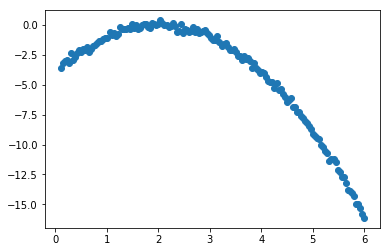

In [15]:
import numpy as np
randomnumber = np.random.randn(150,1)

data_x = np.linspace(0.1, 6.0, 150.0)[:,np.newaxis]
data_y = -np.power(data_x - 2, 2)+0.2*randomnumber


import matplotlib.pyplot as plt
%matplotlib inline


assert data_x.shape == data_y.shape

plt.scatter(data_x, data_y)
